In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Data/Polished/RELATIVE_REG_SEASON_DATA.csv")

In [3]:
print(data)

     Unnamed: 0     TEAM_ID   SEASON  REL_BENCH_PTS  REL_OFF_RTG  REL_W_PCT
0             0  1610612737  2010-11      -0.015224    -0.404078   0.234234
1             1  1610612738  2010-11      -0.850603    -0.152838   1.158506
2             2  1610612739  2010-11       0.921444    -1.566064  -1.696610
3             3  1610612740  2010-11      -0.277296    -0.215648   0.386169
4             4  1610612741  2010-11      -0.694671     0.318238   1.620643
..          ...         ...      ...            ...          ...        ...
355         355  1610612762  2021-22       0.727985     1.485015   0.707263
356         356  1610612763  2021-22       0.918643     0.715245   1.320288
357         357  1610612764  2021-22       1.024471    -0.150747  -0.526000
358         358  1610612765  2021-22       0.902854    -1.946877  -1.586172
359         359  1610612766  2021-22       0.221519     0.747318   0.173570

[360 rows x 6 columns]


                            OLS Regression Results                            
Dep. Variable:            REL_OFF_RTG   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     4.532
Date:                Tue, 23 Jan 2024   Prob (F-statistic):             0.0339
Time:                        11:48:19   Log-Likelihood:                -508.55
No. Observations:                 360   AIC:                             1021.
Df Residuals:                     358   BIC:                             1029.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.148e-15      0.053  -4.09e-14

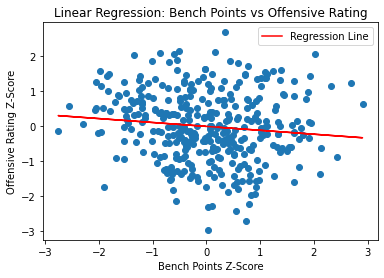

In [5]:
#First, let's do a linear regression for relative offensive rating as a function of relative bench points
X = sm.add_constant(data["REL_BENCH_PTS"])
Y = data["REL_OFF_RTG"]

model = sm.OLS(Y, X)

results = model.fit()

print(results.summary())

plt.scatter(X["REL_BENCH_PTS"], Y)

plt.plot(X['REL_BENCH_PTS'], results.predict(X), color='red', label='Regression Line')

plt.xlabel('Bench Points Z-Score')
plt.ylabel('Offensive Rating Z-Score')
plt.title('Linear Regression: Bench Points vs Offensive Rating')

# Add legend
plt.legend()

# Show the plot
plt.show()

                            OLS Regression Results                            
Dep. Variable:            REL_OFF_RTG   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     4.344
Date:                Tue, 23 Jan 2024   Prob (F-statistic):             0.0378
Time:                        11:56:10   Log-Likelihood:                -312.40
No. Observations:                 360   AIC:                             628.8
Df Residuals:                     358   BIC:                             636.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.1553      0.081     14.222

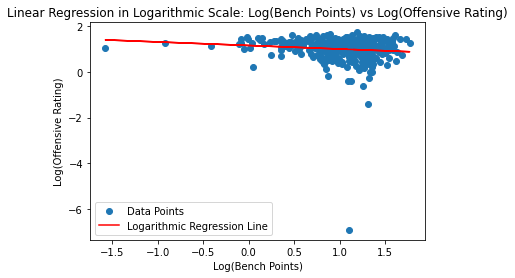

In [10]:
#No statistically significant result. Let's try log scale
X = data['REL_BENCH_PTS']
Y = data['REL_OFF_RTG']

# Add the absolute value of the minimum of all z-scores to make them all positive
min_value = abs(min(X.min(), Y.min()))

#Also have to add by a small constant to make sure the min is not zero
X_shifted = X + min_value + .001
Y_shifted = Y + min_value + .001


X_log = np.log(X_shifted)
Y_log = np.log(Y_shifted)


X_log = sm.add_constant(X_log)


model = sm.OLS(Y_log, X_log)

# Fit the model
results = model.fit()

# Print regression results
print(results.summary())

# Plot the data points
plt.scatter(X_log['REL_BENCH_PTS'], Y_log, label='Data Points')

# Plot the regression line
plt.plot(X_log['REL_BENCH_PTS'], results.predict(X_log), color='red', label='Logarithmic Regression Line')

# Add labels and title
plt.xlabel('Log(Bench Points)')
plt.ylabel('Log(Offensive Rating)')
plt.title('Linear Regression in Logarithmic Scale: Log(Bench Points) vs Log(Offensive Rating)')

# Add legend
plt.legend()

# Show the plot
plt.show()

                            OLS Regression Results                            
Dep. Variable:              REL_W_PCT   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     10.37
Date:                Tue, 23 Jan 2024   Prob (F-statistic):            0.00140
Time:                        11:57:56   Log-Likelihood:                -505.68
No. Observations:                 360   AIC:                             1015.
Df Residuals:                     358   BIC:                             1023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7.763e-17      0.052   1.49e-15

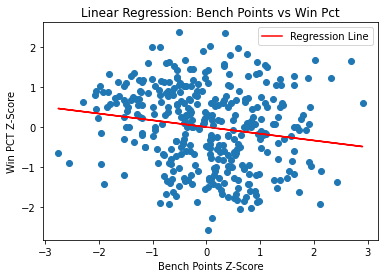

In [11]:
#No statistically significant result here either. Let's check if there is a relationship with win pct
X = sm.add_constant(data["REL_BENCH_PTS"])
Y = data["REL_W_PCT"]

model = sm.OLS(Y, X)

results = model.fit()

print(results.summary())

plt.scatter(X["REL_BENCH_PTS"], Y)

plt.plot(X['REL_BENCH_PTS'], results.predict(X), color='red', label='Regression Line')

plt.xlabel('Bench Points Z-Score')
plt.ylabel('Win PCT Z-Score')
plt.title('Linear Regression: Bench Points vs Win Pct')

plt.legend()

plt.show()

In [ ]:
"""
We got a statistically significant negative relationship negative relationship 
between relative bench scoring and relative win percent. 

Instead of looking at the z-score of bench ppg, let's look at the z-score of proportion of team points that come from 
the bench. 
"""

In [19]:
prop_data = pd.read_csv("Data/Polished/REL_BENCH_PTS_PROP_REG_SEASON_DATA.csv")

In [20]:
print(prop_data)

     Unnamed: 0     TEAM_ID   SEASON  REL_BENCH_PROP  REL_OFF_RTG  REL_W_PCT
0             0  1610612737  2010-11        0.335107    -0.404078   0.234234
1             1  1610612738  2010-11       -0.726431    -0.152838   1.158506
2             2  1610612739  2010-11        1.298882    -1.566064  -1.696610
3             3  1610612740  2010-11       -0.013052    -0.215648   0.386169
4             4  1610612741  2010-11       -0.707288     0.318238   1.620643
..          ...         ...      ...             ...          ...        ...
355         355  1610612762  2021-22        0.467584     1.485015   0.707263
356         356  1610612763  2021-22        0.401514     0.715245   1.320288
357         357  1610612764  2021-22        1.197849    -0.150747  -0.526000
358         358  1610612765  2021-22        1.408451    -1.946877  -1.586172
359         359  1610612766  2021-22       -0.209506     0.747318   0.173570

[360 rows x 6 columns]


                            OLS Regression Results                            
Dep. Variable:            REL_OFF_RTG   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     46.31
Date:                Tue, 23 Jan 2024   Prob (F-statistic):           4.26e-11
Time:                        12:47:07   Log-Likelihood:                -488.92
No. Observations:                 360   AIC:                             981.8
Df Residuals:                     358   BIC:                             989.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2.148e-15      0.050  -4.32e

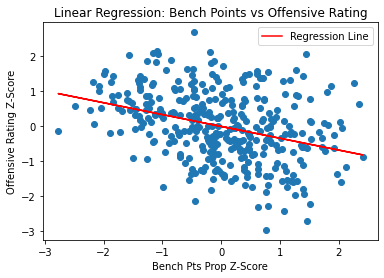

In [21]:
#Check for a linear relationship between relative bench points proportion and relative offensive rating
X = sm.add_constant(prop_data["REL_BENCH_PROP"])
Y = prop_data["REL_OFF_RTG"]

model = sm.OLS(Y, X)

results = model.fit()

print(results.summary())

plt.scatter(X["REL_BENCH_PROP"], Y)

plt.plot(X['REL_BENCH_PROP'], results.predict(X), color='red', label='Regression Line')

plt.xlabel('Bench Pts Prop Z-Score')
plt.ylabel('Offensive Rating Z-Score')
plt.title('Linear Regression: Bench Points vs Offensive Rating')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
"""
Above we got a statistically significant negative relationship between the proportion of points 
coming from the bench and offensive rating. 
"""

                            OLS Regression Results                            
Dep. Variable:            REL_OFF_RTG   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     23.99
Date:                Tue, 23 Jan 2024   Prob (F-statistic):           1.47e-06
Time:                        12:49:11   Log-Likelihood:                -302.90
No. Observations:                 360   AIC:                             609.8
Df Residuals:                     358   BIC:                             617.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.3515      0.078     17.

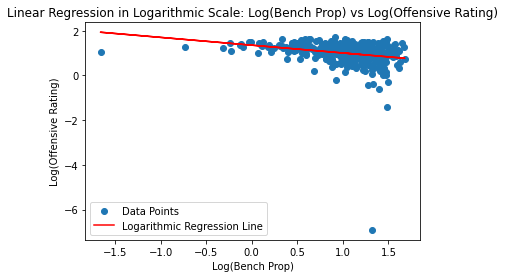

In [22]:
#Let's try in logarithmic scale to see if anything interesting appears
X = prop_data['REL_BENCH_PROP']
Y = data['REL_OFF_RTG']

# Add the absolute value of the minimum of all z-scores to make them all positive
min_value = abs(min(X.min(), Y.min()))

#Also have to add by a small constant to make sure the min is not zero
X_shifted = X + min_value + .001
Y_shifted = Y + min_value + .001


X_log = np.log(X_shifted)
Y_log = np.log(Y_shifted)


X_log = sm.add_constant(X_log)


model = sm.OLS(Y_log, X_log)

# Fit the model
results = model.fit()

# Print regression results
print(results.summary())

# Plot the data points
plt.scatter(X_log['REL_BENCH_PROP'], Y_log, label='Data Points')

# Plot the regression line
plt.plot(X_log['REL_BENCH_PROP'], results.predict(X_log), color='red', label='Logarithmic Regression Line')

# Add labels and title
plt.xlabel('Log(Bench Prop)')
plt.ylabel('Log(Offensive Rating)')
plt.title('Linear Regression in Logarithmic Scale: Log(Bench Prop) vs Log(Offensive Rating)')

# Add legend
plt.legend()

# Show the plot
plt.show()

                            OLS Regression Results                            
Dep. Variable:              REL_W_PCT   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     47.13
Date:                Tue, 23 Jan 2024   Prob (F-statistic):           2.94e-11
Time:                        12:50:27   Log-Likelihood:                -488.56
No. Observations:                 360   AIC:                             981.1
Df Residuals:                     358   BIC:                             988.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           7.763e-17      0.050   1.56e

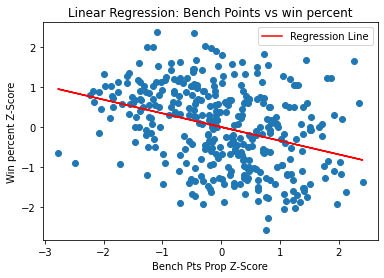

In [23]:
#Now, let's check win percentage
X = sm.add_constant(prop_data["REL_BENCH_PROP"])
Y = prop_data["REL_W_PCT"]

model = sm.OLS(Y, X)

results = model.fit()

print(results.summary())

plt.scatter(X["REL_BENCH_PROP"], Y)

plt.plot(X['REL_BENCH_PROP'], results.predict(X), color='red', label='Regression Line')

plt.xlabel('Bench Pts Prop Z-Score')
plt.ylabel('Win percent Z-Score')
plt.title('Linear Regression: Bench Points vs win percent')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
"""
Similarly, there is a statistically significant, negative relationship between the proportion of points
that come from the bench and win percent. 


Next, let's try to see how increase in raw bench point production in a playoff series over regular season
affects series offensive rating +  likelihood of winning.
"""

In [ ]:
#First analysis: likelihood of winning based on whether your bench produces more points than the opponents bench

In [ ]:
#Get all teams in season


In [ ]:
#Second analysis: likelihood of winning based on your bench scoring in series compared to season average